In [1]:
%matplotlib inline
import numpy as np
from numpy.linalg import svd, norm
import cv2
from collections import defaultdict

from mnist import MNIST
from matplotlib import pyplot as plt

In [2]:
mnist_path = '/home/jerin/college/s18/ipsc/parallel-svd-ish-stuff/mnist'

In [3]:
mndata = MNIST(mnist_path)

In [4]:
images, labels = mndata.load_training()

In [5]:
def group(images, labels, size):
    grouped = defaultdict(list)
    for image, label in zip(images, labels):
        img = np.array(image, dtype=np.float64)
        img = cv2.resize(img, size)
        grouped[label].append(img.ravel())
    return grouped

In [6]:
grouped = group(images, labels, size=(8, 8))
for key in grouped:
    print(key, len(grouped[key]))

5 5421
0 5923
4 5842
1 6742
9 5949
2 5958
3 6131
6 5918
7 6265
8 5851


In [7]:
sample = grouped[7][0]
sample = sample.reshape(8, 8)

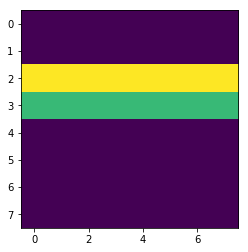

In [8]:
plt.imshow(sample)

In [21]:
def basis(images):
    A = np.array(images).transpose()
    u, s, vh = svd(A)
    print(s)
    return u
    
def loss(U):
    def _loss(z):
        alpha = np.dot(U.transpose(), z)
        return norm(z - np.dot(U, alpha))
    return _loss


In [ ]:
bases = {}
k = 7

for key in grouped:
    bases[key] = basis(grouped[key])[:k]


In [20]:
stats = defaultdict(int)
from tqdm import tqdm

for key in tqdm(grouped, desc='key'):
    for img in tqdm(grouped[key], desc='sample'):
        probs = []
        img = img.ravel().reshape(-1, 1)
        for second in grouped:
            prob = (second, loss(bases[second].transpose())(img))
            probs.append(prob)
        label = min(probs, key=lambda x: x[1])
        stats[label == key] += 1

print(stats)
            

key: 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]95.88it/s]

defaultdict(<class 'int'>, {False: 60000})
